In [1]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=53c12391574d5a537d1b8795ff465d498400df048ab95e787e1acaed2ace41ba
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [3]:
df_train = pd.read_excel("/kaggle/input/sent-nob-clean/sentnob_train.xlsx")

In [4]:
df_train.head()

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

374


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_excel("/kaggle/input/sent-nob-clean/sentnob_val.xlsx")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(, test_size=0.2,stratify=df['classes'],random_state=42)


In [15]:
X_train  =  df_train['Text'].values.tolist()
y_train = df_train['Label'].tolist()

In [16]:
X_test =  df_val['Text'].values.tolist()
y_test = df_val['Label'].tolist()

In [17]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 10.9 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=a2768422e88cf5968df3e45af1808c010353fa1322919091ed489a72f1189b8b
  Stored in directory: /roo

In [18]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [19]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 15
	95percentile : 36
	99percentile : 46


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 16
	95percentile : 36
	99percentile : 45


In [20]:
print(trn)

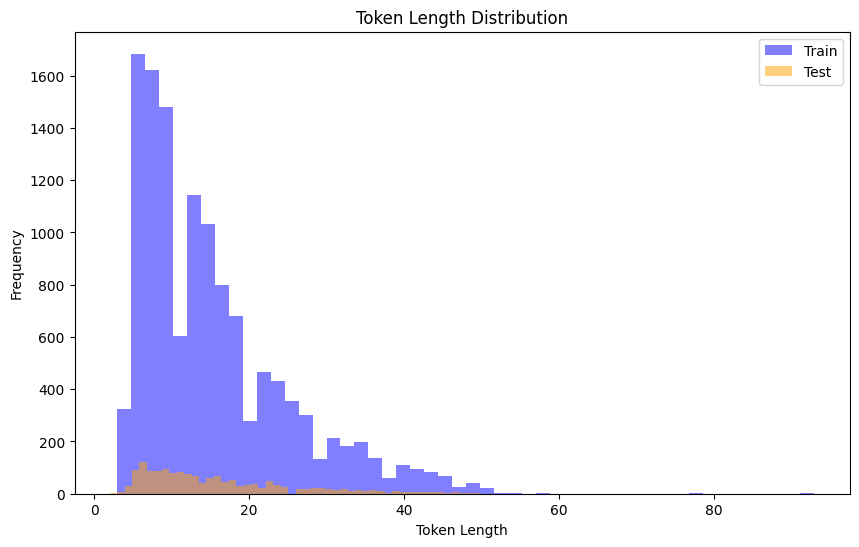

In [21]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [22]:
model = t.get_classifier()

In [23]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [24]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [25]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 940s 581ms/step - loss: 0.9585 - accuracy: 0.5276 - val_loss: 0.7972 - val_accuracy: 0.6477
Epoch 2/10
1572/1572 [==============================] - 909s 578ms/step - loss: 0.7953 - accuracy: 0.6475 - val_loss: 0.7751 - val_accuracy: 0.6414
Epoch 3/10
1572/1572 [==============================] - 909s 578ms/step - loss: 0.7081 - accuracy: 0.6950 - val_loss: 0.7426 - val_accuracy: 0.6739
Epoch 4/10
1572/1572 [==============================] - 909s 578ms/step - loss: 0.6165 - accuracy: 0.7413 - val_loss: 0.7156 - val_accuracy: 0.6988
Epoch 5/10
1572/1572 [==============================] - 909s 578ms/step - loss: 0.5277 - accuracy: 0.7883 - val_loss: 0.7910 - val_accuracy: 0.6790
Epoch 6/10
1572/1572 [==============================] - 909s 578ms/step - loss: 0.4232 - accuracy: 0.8319 - val_loss: 0.8598 - val_accuracy: 0.6994
Epoch 7/10
1572/1572 [===========================

In [26]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [27]:
classes=t.get_classes()

In [28]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 12s 180ms/step
              precision    recall  f1-score   support

    Negative       0.79      0.74      0.76       590
     Neutral       0.50      0.53      0.51       354
    Positive       0.76      0.78      0.77       623

    accuracy                           0.71      1567
   macro avg       0.68      0.68      0.68      1567
weighted avg       0.71      0.71      0.71      1567



In [29]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [30]:
!zip -r mental.zip /kaggle/output/mental-health-rand

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/mental-health-rand

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/mental-health-rand)


In [31]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [32]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [33]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")